# Analisi sulla Popolazione Italiana 2019-2022
### Descrizione:
Progetto creato da Filippo Cappella in data 01/01/2024.<br>
Questa analisi ha come obiettivo evidenziare e mostrare tramite grafici e fatti l'andamento della popolazione Italiana e riportare problemi e crisi che ne conseguono.<br>
L'analisi prende in esame i dati del periodo dal 2019 al 2022.<br>
<br>
Fonti:
- Istat
- The World Factboock
- Statista
- Our World in Data
- OECD
- Worldometers
- Wikipedia
- IHME
- ONU

In [2]:
##INSTALLING LIBRARIES
#Commented to save some execution time
#pip install numpy pandas plotly matplotlib pyarrow

In [3]:
##SETUP
#Import libraries
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

#Read and store every DB
cf = pd.read_csv("./dataset/CF_popolazione_eta.csv",encoding="utf-8",delimiter=",")
df = pd.read_csv("./dataset/DF_indicatori_demografici.csv", encoding="utf-8",delimiter=",")
ff = pd.read_csv("./dataset/FF_fertilità_mondiale.csv", encoding="utf-8",delimiter=",")
gf = pd.read_csv("./dataset/GF_urbanizzazione_mondiale.csv", encoding="utf-8",delimiter=",")
sf = pd.read_csv("./dataset/SF_popolazione_residente.csv", encoding="utf-8",delimiter=",")

### **Primo Grafico:** Popolazione del 1° Gennaio e del 31° Dicembre
Nel seguente grafico vediamo la popolazione Italiana censita il _1° Gennaio_ e il _31° Dicembre_.<br>
Il censimento del _1° Gennaio 2019_ riporta la popolazione a circa **60 milioni**, l'andamento è rimasto negativo per tutto il periodo portando al _31 Dicembre 2022_ la popolazione ad un totale di circa **58.9 milioni**, una diminuizione di circa _1 milione_ di abitanti<br>
Un salto importante nella popolazione lo si può notare nel **2020**, dove l'Italia è stata una delle maggiori vittime di _COVID-19_, con ben **26.7 milioni** di casi e ben **196 mila** morti accertate, ad oggi abbiamo ben _180 mila_ casi ancora attivi con soli _106_ di questi in condizioni critiche.<br>

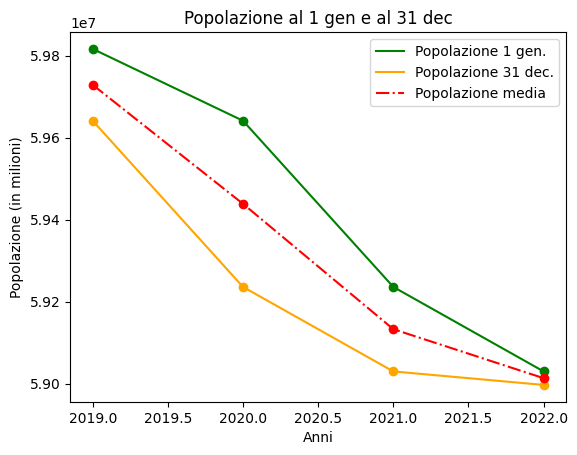

In [44]:
##GRAPH: POPULATION 1 JAN AND 31 DEC
#Selection of columns
years = sf['Periodo']
value = sf['popolazione censita al 1° gennaio']
value2 = sf['popolazione censita al 31 dicembre']
mean = np.array([0.0,0.0,0.0,0.0])

for i in range(0,len(mean)):
    mean[i] = (value[i]+value2[i])/2

#Creation of the graph
plt.plot(years,value,color='green',label="Popolazione 1 gen.")
plt.scatter(years, value, color="green")
plt.plot(years,value2,color='orange',label="Popolazione 31 dec.")
plt.scatter(years, value2, color="orange")
plt.plot(years,mean,color='red',label="Popolazione media", linestyle="dashdot")
plt.scatter(years, mean, color="red")
plt.xlabel('Anni')
plt.ylabel('Popolazione (in milioni)')
plt.title('Popolazione al 1 gen e al 31 dec')
plt.legend()

#Show the figure
plt.show()

### **Secondo Grafico:** Tasso di Mortalità e Natalità
In questo grafo possiamo vedere nello specifico l'andamento di natalità e mortalità.<br>
Come già notato nel grafico precedente possiamo vedere l'andamento negativo della popolazione, con la mortalità di gran lunga superiore alla natalità.<br>
Nel **2020** il saldo naturale raggiunge il suo picco più basso con un valore di **-335425**, come detto nel grafo precedente, dovuto soprattutto dalla pandemia di _COVID-19_.<br>
Ma nonostante eventi catastrofici il saldo naturale non tende a migliorare e durante il periodo ha una media di **-300 mila** individui.<br>
Questa altissima mortalità è dovuta da diversi fattori, oltre alle malattie, come:
- Età avanzata della popolazione
- Livelli di Fertilità bassi
- Aumento dell'età media della donna al primo parto
- Difficoltà economiche nel crescere uno o più figli

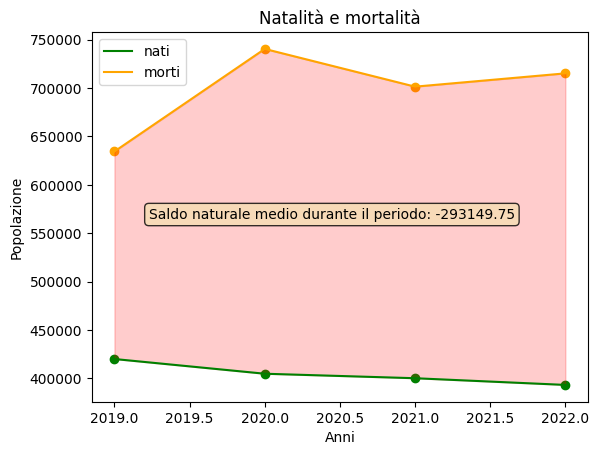

In [58]:
##GRAPH: BIRTH AND DEATH
#Selection of the columns
years = sf['Periodo']
value = sf['nati vivi']
value2 = sf['morti']
mean = np.mean(sf['saldo naturale'])

#Creation of the dictionary for the textbox and the text
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
text=f"Saldo naturale medio durante il periodo: {mean}"

#Creation of the graph
plt.plot(years,value,color='green',label="nati")
plt.scatter(years, value, color="green")
plt.plot(years,value2,color='orange',label="morti")
plt.scatter(years, value2, color="orange")

plt.fill_between(years, value, value2, color='red', alpha=0.2)
plt.text(0.5,0.5,text, bbox=props,transform=plt.gcf().transFigure, ha="center",va="center")

plt.xlabel('Anni')
plt.ylabel('Popolazione')
plt.title('Natalità e mortalità')
plt.legend()

#Show the figure
plt.show()

### **Terzo Grafico:** Popolazione divisa in fasce di età
In questi grafici a torta possiamo vedere come negli anni la popolazione giovanile non è mai aumentata.<br>
La **fascia giovanile (0-14 anni)** e **adulta (15-64 anni)** diminuiscono sempre più durante gli anni.<br>
La **fascia anziana (65+ anni)** invece è l'unica che è aumentata di numero, dato l'invecchiare della popolazione, arrivando del **2022** al **doppio** della _fascia giovanile_.<br>
Questi grafici a torta ci mostrano un altro grande problema, la _forza lavoro e l'economia dello Stato Italiano_.<br>
La maggior parte delle nazioni del mondo riportano fasce più equilibrate, con fascia maggiore quella _adulta_ e _fascia giovanile_ superiore a quella _anziana_.<br>
Alcuni esempi:
- **Brasile** : Fascia Giovanile _19.77%_, Adulta _69.72%_, Anziana _10.51%_
- **USA** : Fascia Giovanile _22.2%_, Adulta _61.0%_, Anziana _16.8%_
- **India** : Fascia Giovanile _25.68%_, Adulta _67.49%_, Anziana _6.83%_
- **Afghanistan** : Fascia Giovanile _42.3%_, Adulta _55.3%_, Anziana _2.4%_
- **Sud Africa** : Fascia Giovanile _28.8%_, Adulta _65.2%_, Anziana _6.0%_
- **Albania** : Fascia Giovanile _17.60%_, Adulta _69.37%_, Anziana _13.03%_<br><br>
Per una nazione avere una percentuale di anziani così alta comporta un enorme costo, perchè:
- La _fascia giovanile_ ha un costo per lo Stato ma in futuro diventerà manodopera e quindi è un costo necessario per mantenere l'economia futura, in questa fascia gli individui passano il tempo studiando e imparando nuove abilità per aumentare la propria qualità di lavoro.
- La _fascia adulta_ rappresenta l'economia presente dello Stato, questi individui creano lavoro, offrono manodopera e lo Stato raccoglie denaro tramite imposte e tasse.
- La _fascia anziana_ sono ex-lavoratori in pensione, a carico dello Stato il quale mensilmente pagano una somma per il loro sostentamento, perciò è una spesa per lo Stato che non supporta l'economia ma il benessere della società

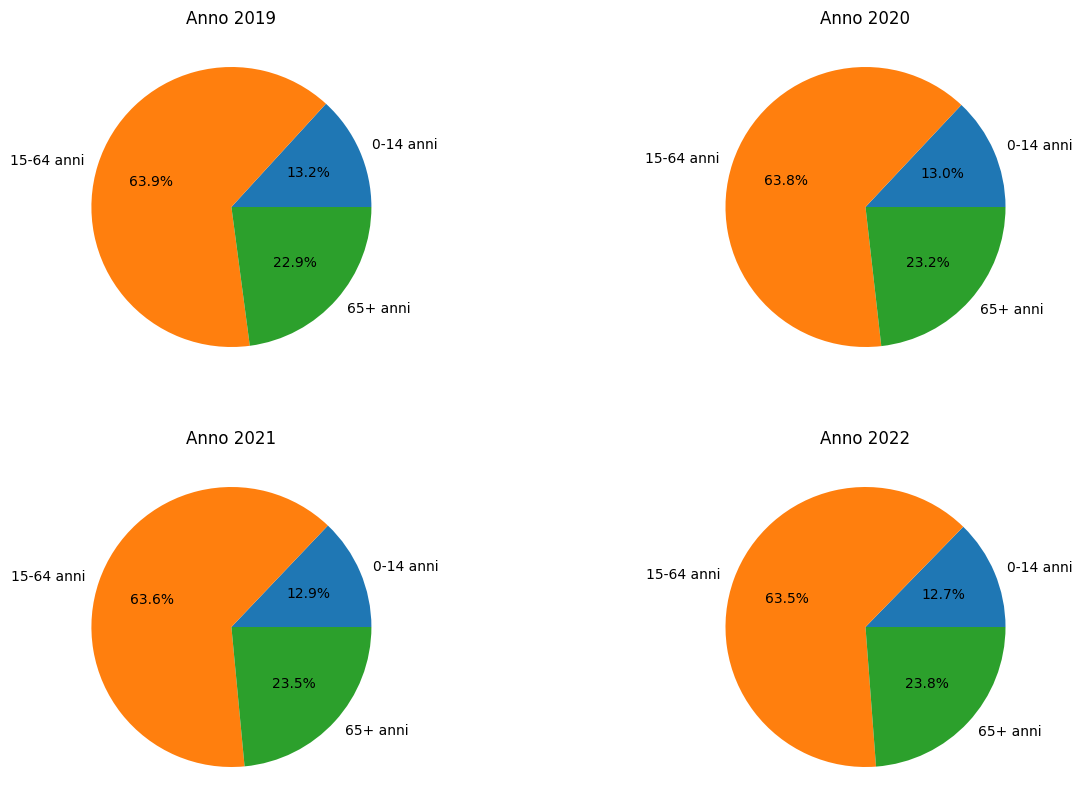

In [6]:
##PIE GRAPH: POPULATION AGE AND MEAN
#Selection of the columns
years = df['Periodo']
col = 'popolazione 0-14 anni al 1° gennaio (valori percentuali) - al 1° gennaio'
col2 = 'popolazione 15-64 anni (valori percentuali) - al 1° gennaio'
col3 = 'popolazione 65 anni e più (valori percentuali) - al 1° gennaio'

#Creation of the figure with four separate pie chart 
fig,axn = plt.subplots(2,2,figsize=(15,10))

#Loop to fill every pie chart
for i in range(2):
    for j in range(2):
        #Selection of the year and right row with year confrontation
        year = years[i*2+j]
        value = df[(df['Periodo'] == year) & (df[col])][col].values[0]
        value2 = df[(df['Periodo'] == year) & (df[col2])][col2].values[0]
        value3 = df[(df['Periodo'] == year) & (df[col3])][col3].values[0]

        #Creation of the array with data and labels
        data = np.array([value,value2,value3])
        labels = np.array(['0-14 anni','15-64 anni','65+ anni'])

        #Creation of the pie chart and the title by selecting the right year
        axn[i, j].pie(data,labels=labels,autopct='%.1f%%')
        axn[i, j].grid()
        axn[i, j].set_title(f'Anno {year}')

#Show the figure
plt.show()

### **Quarto Grafico:** Piramide dell' età della Popolazione
In questo grafico, oltre a mostrarci la divisione per sessi, possiamo vedere la distribuzione accurata delle età, le età vanno **da 0 anni fino a 100 e più anni**, come si può già notare la parte intermedia, dai _30 ai 60 anni_ circa presenta un picco, mostrandoci visivamente la distribuzione del grafico precedente.<br>
Nelle nazioni precedentemente elencate, il picco di popolazione è presente alla "base" o nelle prossimità della piramide, mantenendo un numero basso alle età più anziane.<br>
Nel nostro caso il picco si trova a metà delle piramide con una discesa meno ripida rispetto alla ripida salita dalle età giovanili.<br>
_L'avanzare dell'età media_ ci accentua lo spostamento del picco verso l'età anziana senza cenni di cedimento, nel mentre le nascite durante il periodo sono sempre più basse.<br>
Questi grafici ci mostrano al meglio la distribuzione della popolazione e la crisi che stiamo vivendo, non solo, se proiettiamo il grafico nel futuro possiamo immaginare le gravi **crisi** non solo _sulla popolazione ma anche sull'economia e sul lavoro Italiano._

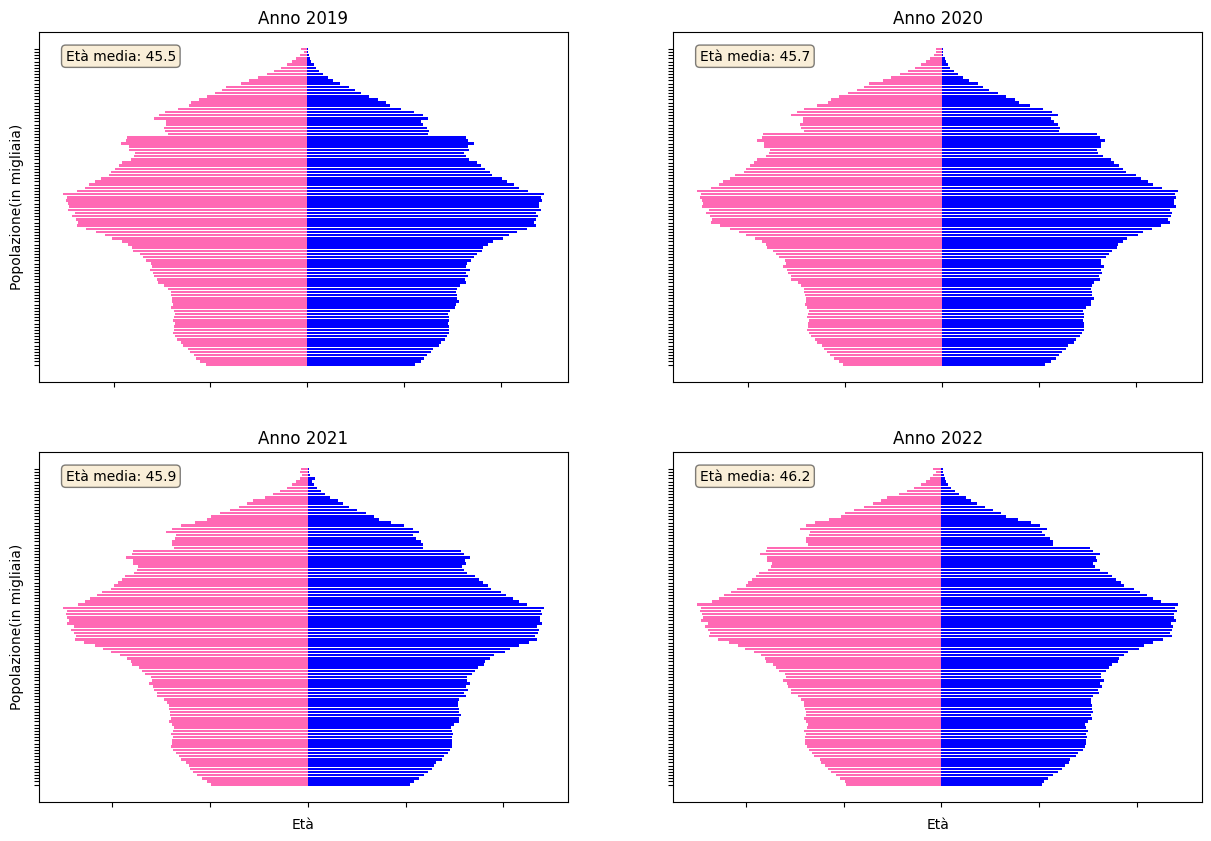

In [41]:
##HISTOGRAM: AGE OF EVERY YEAR
#Selection of years and the columns
col = cf.columns[2:]
years = cf['Periodo']
years = list(set(years)) #Remove duplicate

#Creation of the figure with four separate histogram
fig,axn = plt.subplots(2,2,figsize=(15,10))

#Loop to fill every histogram
for i in range(2):
    for j in range(2):
        #Selection of the year and right row with year confrontation
        year = years[i*2+j]
        year_popm = cf[(cf['Periodo'] == year) & (cf['Sesso'] == 'maschi')][col].values[0]
        year_popf = cf[(cf['Periodo'] == year) & (cf['Sesso'] == 'femmine')][col].values[0] * -1
    

        #Selection from the DB the mean age of that year, convert from pandas DataFrame to Series
        mean = df[df['Periodo'] == year]["età media della popolazione - al 1° gennaio"]
        mean = mean.squeeze()

        #Creation of the textbox for the mean age of that year
        axn[i, j].text(0.05, 0.95, f'Età media: {mean}',transform=axn[i, j].transAxes, fontsize=10, verticalalignment='top', bbox=props)

        #Creation of the histogram and the title by selecting the right year
        axn[i, j].barh(col, year_popf, color="hotpink", label="Femmine",align="center")
        axn[i, j].barh(col, year_popm, color="blue", label="Maschi",align="center")

        axn[i, j].set_title(f'Anno {year}')

#Fix the labels on each histogram and delete the x ticks
for ax in axn.flat:
    ax.set(xlabel='Età', ylabel='Popolazione(in migliaia)')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.label_outer()

#Show the figure
plt.show()

### **Quinto Grafico:** Tasso di Fertilità e Età media della donna al primo parto
Con questo grafico ho riportato il **tasso di fertilità** durante il periodo e **l'età media della donna al primo parto**, in Italia abbiamo un tasso medio di circa _1.25 figli per donna_, il terzo tasso più basso al mondo _(Spagna 1.20, Malta 1.13)_, l'età media della donna al primo parto equivale a _32.3 anni_, valore molto alto in confronto con altre nazioni, nel grafico sono riportati alcuni esempi per confrontare i dati:<br>
- **Canada**, ha una media di circa _1.36_ con l'età media di parto a _30 anni_
- **Danimarca**, ha una media di circa _1.67_ con l'età media di parto a _30 anni_
- **India**, ha una media di circa _2.15_ con l'età media di parto a _21 anni_
- **Indonesia**, ha una media di circa _2.2_ con l'età media di parto a _22 anni_<br><br>
Dal grafico vediamo già la differenza fra queste varie nazioni, ovviamente sulla fertilità di una nazione incidono anche:<br>
- Norme e leggi nazionali
- Livelli di Sanità
- Livelli di Inquinamento
- PIL pro capite
- Urbanizzazione<br><br>
Quest'ultimo è un fattore decisivo nella popolazione e ha portato a diminuire la grandezza della famiglia, approfondimento nel prossimo grafico.

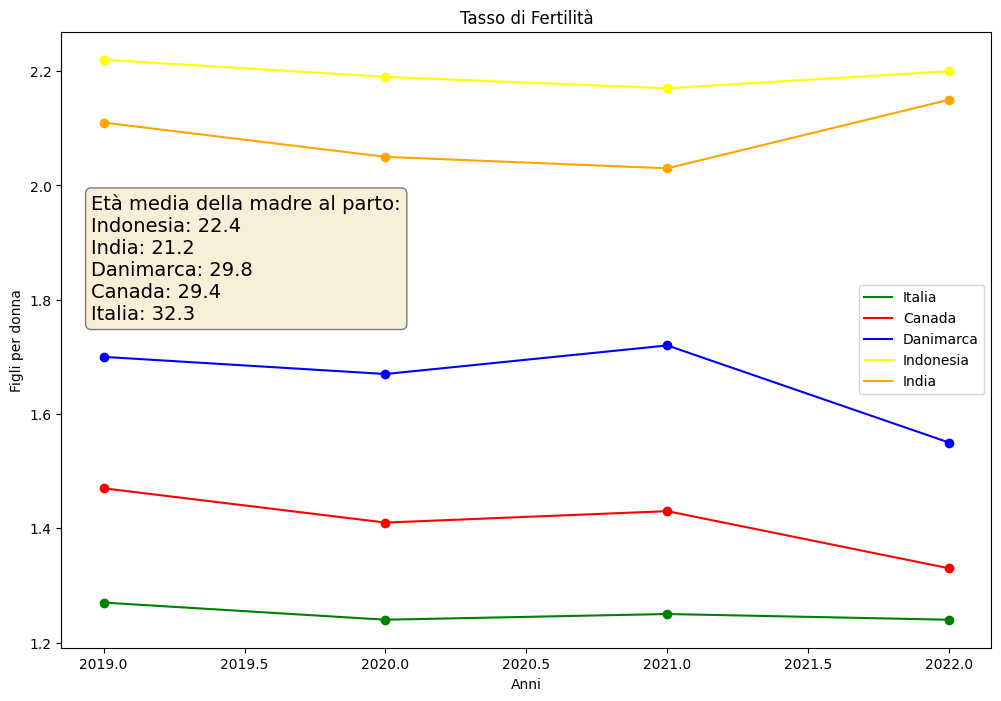

In [8]:
##GRAPH: FERTILITY RATE AND MOTHER'S MEAN AGE OF BIRTH
#Selection of the columns
years = df['Periodo']
valueIT = df['numero medio di figli per donna']
value2IT = np.round(np.mean(df['età media della madre al parto']),1)

#Data estraction from web: Canada
valueCA = np.array([1.47,1.41,1.43,1.33])
value2CA = np.round(29.4,1)

#Data estraction from web: Denmark
valueDE = np.array([1.70,1.67,1.72,1.55])
value2DE = np.round(29.8,1)

#Data estraction from web: Indonesia
valueIN = np.array([2.22,2.19,2.17,2.2])
value2IN = np.round(22.4,1)

#Data estraction from web: India
valueIND = np.array([2.11,2.05,2.03,2.15])
value2IND = np.round(21.2,1)

#Creation of the graph
plt.figure(figsize=(12,8))

#Creation of the Italian line
plt.plot(years,valueIT,color='green',label="Italia")
plt.scatter(years, valueIT, color="green")

#Creation of the Canadian line
plt.plot(years,valueCA,color='red',label="Canada")
plt.scatter(years, valueCA, color="red")

#Creation of the Danish line
plt.plot(years,valueDE,color='blue',label="Danimarca")
plt.scatter(years, valueDE, color="blue")

#Creation of the Indonesian line
plt.plot(years,valueIN,color='yellow',label="Indonesia")
plt.scatter(years, valueIN, color="yellow")

#Creation of the Indian line
plt.plot(years,valueIND,color='orange',label="India")
plt.scatter(years, valueIND, color="orange")

#Creation of the textbox with the mean age of the mom at the birth
text = f"Età media della madre al parto:\nIndonesia: {value2IN}\nIndia: {value2IND}\nDanimarca: {value2DE}\nCanada: {value2CA}\nItalia: {value2IT}"
plt.text(0.15, 0.52, text, fontsize=14, transform=plt.gcf().transFigure,bbox=props)

#Creation of labels and title
plt.xlabel('Anni')
plt.ylabel('Figli per donna')
plt.title('Tasso di Fertilità')
plt.legend()

#Show the figure
plt.show()

### **Sesto Grafico:** Tasso di Fertilità Mondiale e Tasso Popolazione Urbana dal 1950-2050
In quest'ultimo grafico ho voluto mostrare come l'Urbanizzazione sia una delle cause principali di questa diminuizione delle nascite.<br><br>
Nel primo grafico si può vedere la linea che nei primi anni _'50_ fino agli anni _'70_ ha sempre mantenuto, con qualche picco e depressione, lo stesso livello, arrivando al picco massimo nel **1963** con ben _5.32_ figli per donna.<br>
Nel mentre la percentuale di abitanti in zone urbane aumentava, raggiungendo negli anni _'70_ circa il _36%_, questo era dovuto dalle fabbriche e dalla nuova economia che colpì in quel periodo.<br><br>
Con gli anni a seguire la Fertilità ha cominciato a scendere ad un ritmo costante, la sua discesa fino agli anni _'00_ è stata molto ripida passando da un tasso di _3.75_ nel **1980** a _2.73_ nel **2000**.<br>
Intanto l'Urbanizzazione è cresciuta a passo costante, raggiungendo negli anni _'00_ quasi il _45%_, poco meno del _50%_ della popolazione mondiale viveva in città o zone urbane, il che equivale a **2,751 miliardi**.<br><br>
Nell'anno presente, **2024**, il tasso di fertilità equivale a _2.31_ con un tasso di popolazione Urbana del _57%_, con una popolazione mondiale di **8,089 miliardi**, **4,61 miliardi** vivono in zone urbane.<br><br>
Secondo le previsioni non si notano cenni di cedimento, la fertilità, anche se con una minore ripidità, raggiungerà nel **2050** il _2.15_, un tasso così basso porterà presto la popolazione mondiale a calare a picco, secondo l'**ONU** nel _2050_ toccheremo i **9,7 miliardi** di abitanti sulla Terra, dove il _69%_ vivrà in zone urbane, cioè **6,693 miliardi** individui.<br>
Entro il **2100** la popolazione mondiale calerà a **8,8 miliardi**, secondo l'**IHME**, di cui l' _80%_ vivrà in zone urbane, secondo l'**ONU**, cioè ben **7,04 miliardi** individui.

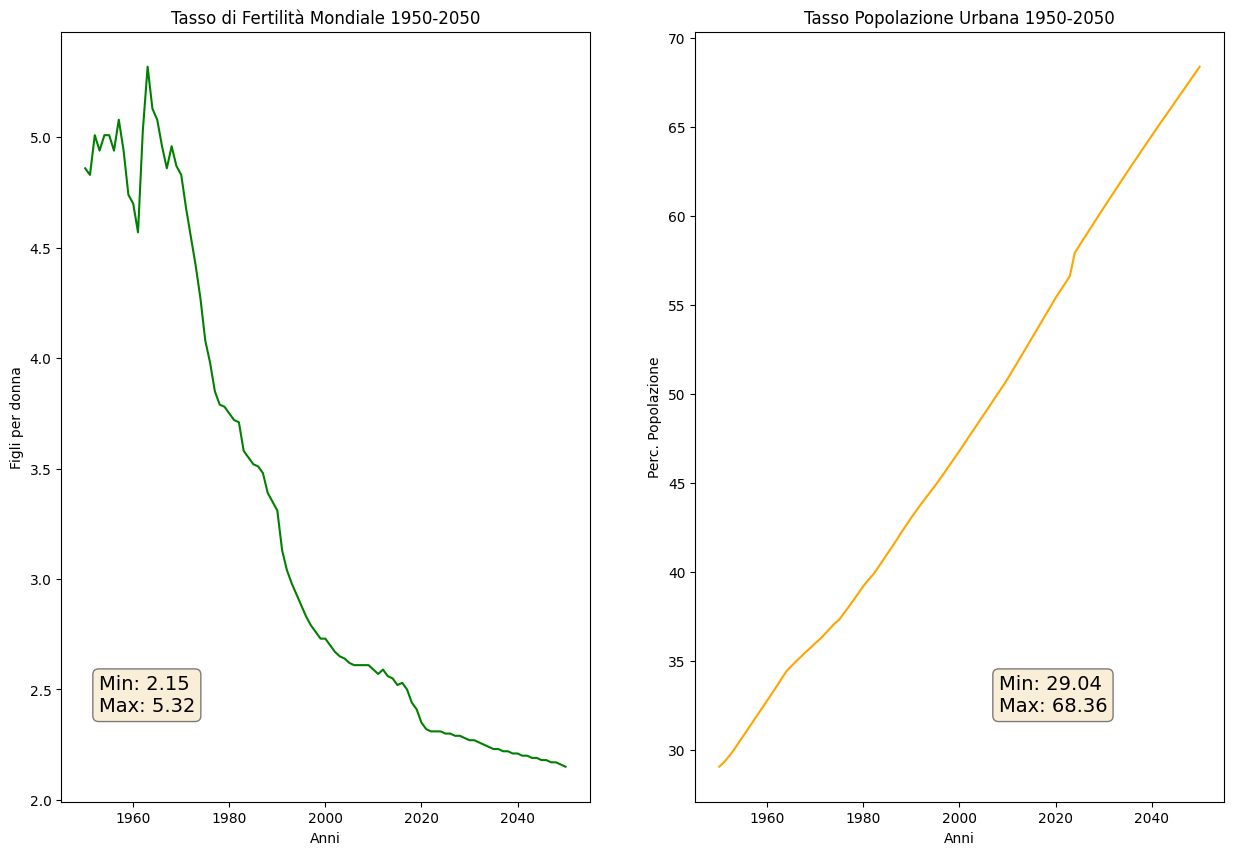

In [9]:
##GRAPH: WORLD FERTILITY RATE WITH PROJECTIONS AND WORLD URBANIZATION
#Selection of the columns
years = ff[ff["Year"] <= 2050]["Year"]
value = ff[ff["Year"] <= 2050]["Total Fertility Rate"]
text= f"Min: {min(value)}\nMax: {max(value)}"

value2 = round(gf[(gf['Entity'] == 'World') & (gf['Year'] >= 1950)]["Share of population residing in urban areas (HYDE estimates and UN projections)"],2)
text2= f"Min: {min(value2)}\nMax: {max(value2)}"

#Creation of the two Graphs
fig,axn = plt.subplots(1,2,figsize=(15,10))

#Creation of the Graph Fertility Rate
axn[0].plot(years,value,color='green',label="Tasso Fert.")
axn[0].set(xlabel='Anni',ylabel='Figli per donna')
axn[0].set_title('Tasso di Fertilità Mondiale 1950-2050')
axn[0].text(0.15, 0.2, text, fontsize=14, transform=plt.gcf().transFigure,bbox=props)

#Creation of the Graph Urbanization
axn[1].plot(years,value2,color='orange',label="Tasso Fert.")
axn[1].set(xlabel='Anni',ylabel='Perc. Popolazione')
axn[1].set_title('Tasso Popolazione Urbana 1950-2050')
axn[1].text(0.75, 0.2, text2, fontsize=14, transform=plt.gcf().transFigure,bbox=props)

#Show the graph
plt.show()

# **Conclusione**
Studiando database e analizzando articoli ho potuto raccogliere tutti i dati necessari per comporre questa analisi, durante la sua lavorazione non posso nascondere la mia preoccupazione per il futuro del mio paese ma soprattutto del mondo intero, dato che non solo l' Italia subisce questo declino.<br>
La situazione Italiana è problematica e si può tranquillamente definire una crisi, come molti sostengono, in pochi anni l'Italia si estinguerà, senza una forte svolta è difficile che la situazione presente si riprenda e cambia, la crisi non solo è riferita a livello demografico ma anche a livello economico, sociale e politico, una nazione senza un popolo non ha futuro e il suo unico destino è soccombere.<br>
Continuando con gli anni la fascia anziana continuerà ad ingrandirsi fino a triplicare la fascia giovanile, questo è dovuto molto dall'aumentare della speranza di vita, in Italia la speranza di vita media nel 2024 è di 82.6 anni, con gli anni aumenta sempre più, nel 2015 equivaleva a 80.1 anni, portando la fascia anziana ad aumentare sempre più.<br>
Una situazione analoga è quella Mondiale, dove la fertilità e la fascia anziana cresce sempre più, ovviamente ogni continente e nazione ha le proprie differenze, ma si può notare un fattore comune fra tutti gli stati, uno fra tutti l'Urbanizzazione.<br>
Quest'ultima causa un cambio nello stile di vita, dove la velocità e frenesia non lascia spazio a uno o più figli, proprio per ragioni sociali, economiche o nazionali molte famiglia non hanno figli o limitano il loro numero, basti pensare alla Cina che introdusse il "One Child Policy", dove lo il Governo Cinese limitò le famiglie ad un solo figlio per via del preoccupante aumento della popolazione Cinese.<br>
In conclusione, l'analisi ci ha mostrato il declino della popolazione Italiana e che questo limitato non si limita solo alla nostra nazione ma al mondo intero, anche se l'Italia è una delle nazioni più colpite.